# Data-Science Project


## Machine Learning - House price prediction 

La idea de este proyecto es predecir por medio de un algoritmo de Regresion Lineal el precio una propiedad en funcion
de ciertas caracteristicas que posee. Esas features pueden ser: ubicacion, habitaciones, baños, metros cuadrados, etc. 



Con el Dataset obtenido desde Kaggle se aplicara ciertos conceptos de DataScience como #DataCleaning #FeatureEngineering, la reduccion de Dimensionalidad, eliminacion de #Outliers, entre otros.

Utilizaremos #Pandas y #Numpy para el analisis y limpieza de datos, #Matplot para la visualizacion, #SKlearn para la contruccion
del algoritmo y demas.

In [226]:
#Importamos libreriras de relevancia
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

In [227]:
#Levantamos el Dataset a utilizar y lo guardamos en un Dataframe 
df=pd.read_csv('Bengaluru_House_Data.csv')

In [228]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [229]:
df.shape

(13320, 9)

#### Analizamos cada una de las variables para ver si las tenemos en cuenta para considerarla feature

In [230]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [231]:
df.groupby('area_type').area_type.count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [232]:
df.groupby('balcony').balcony.count()

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [233]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


Dado la informacion que otorga cada una de las variables independiente decidimos que las columnas 'area_type','availability' y 'society' no van a ser tenidas en cuenta por lo que las elimnaremos de nuestro DF

In [234]:
df1=df.drop(['area_type','availability','society','balcony'],axis=1)

In [235]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


### Data-cleaning process

Verificamos cuantos valores nullos tenemos en cada variable. Al ser pocos registros eliminaremos las filas correspondientes.

In [236]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [237]:
df2=df1.dropna()


In [238]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [239]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Analizamos la variable 'size' que parece contener datos numericos mezclados con strings

In [240]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [241]:
df2[df2['size']=='43 Bedroom']

,location,size,total_sqft,bath,price
4684,Munnekollal,43 Bedroom,2400,40.0,660.0


Dado que tiene valores string con numeros y palabras le aplicaremos una funcion para obtener el solamente el numero en una nueva columna 'bhk'

In [242]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\fedev\AppData\Local\Temp\ipykernel_2840\1154073957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [243]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [244]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [245]:
df2[df2['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


Identificamos que hay varios outliers en cantidad de habitaciones, pero para poder hacer un mejor analisis interpretaremos las otras variables

#### Hacemos una exploracion de valores de la variable 'total_sqft'

In [246]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Existen valores que pueden ser considerados float de por si por lo cual para identificarlos, creamos una funcion

In [247]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [248]:
#Filtramos por los valores que nos ha retornado FALSE, es decir por los que no pueden convertirse en Float
df2[~df2['total_sqft'].apply(isfloat)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [249]:
#Vemos cuantos valores habria que corregir
df2[~df2['total_sqft'].apply(isfloat)].total_sqft.nunique()

173

In [250]:
df2[~df2['total_sqft'].apply(isfloat)].total_sqft.head(10)

30        2100 - 2850
122       3067 - 8156
137       1042 - 1105
165       1145 - 1340
188       1015 - 1540
410    34.46Sq. Meter
549       1195 - 1440
648         4125Perch
661       1120 - 1145
672       3090 - 5002
Name: total_sqft, dtype: object

#Le aplicamos una funcion para intentar convertir los valores en float. Para los que cuentan con 2 extremos, sacaremos el promedio, mientras que para quienes poseean un solo valor nos quedaremos con ese

In [251]:
def convertir_en_numero(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [252]:
#Aplicamos la formula para ver como actua
convertir_en_numero('1800')

1800.0

In [253]:
convertir_en_numero('1195 - 1440')

1317.5

In [254]:
convertir_en_numero('4125Perch')

In [255]:
#Creamos un nuevo DF para trabajar seguros
df3=df2.copy()

In [256]:
#Aplicamos la nueva funcion a la columna total_sqf
df3['total_sqft']=df3['total_sqft'].apply(convertir_en_numero)

In [257]:
df3.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [258]:
#Corroboramos que no hayan valores que no se puede aplicar float
df3[~df3['total_sqft'].apply(isfloat)].total_sqft.head(10)

Series([], Name: total_sqft, dtype: float64)

In [259]:
#Chequeamos con algun registro que se haya aplicado bien la formula
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

## Feature Engineering 

In [260]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


Creamos una nueva columna para averiguar el precio por metro cuadrado(precio/metros). La columna "Price" esta en rupias indias por lo que multiplcaremos su valor
por 100.000 para tener un precio acorde

In [261]:
df4=df3.copy()

In [262]:
df4['price_per_sqft']=round(df4['price']*100000/df4['total_sqft'],2)

In [263]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


Exploramos la variable location

In [264]:
df4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [265]:
df4['location'].nunique()

1304

Podemos interpretar que teniendo tantas ubicaciones (1304) puede ser problematico para cuando debamos crear nuestro algoritmo ya que al crear los dummies correspondiente y el one-hot encoding pasaremos a tener esa misma cantidad de variables, lo cual no es conveniente.

In [266]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13246 non-null  object 
 1   size            13246 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13246 non-null  float64
 4   price           13246 non-null  float64
 5   bhk             13246 non-null  int64  
 6   price_per_sqft  13200 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ MB


In [267]:
df4.groupby('location').location.count().sort_values(ascending=False)

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [268]:
df4.location=df4.location.apply(lambda x:x.strip())

In [269]:
locations=df4.groupby('location').location.count().sort_values(ascending=False)

In [270]:
locations

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

Vemos que un 80% de las ubicaciones tienen menos de 10 registros. Para no tener tantas variables todas estas las agruparemos en 'Otros'

In [271]:
ubicaciones_menor_a_10=locations[locations<=10]

In [272]:
len(ubicaciones_menor_a_10)

1052

In [273]:
df4.location.nunique()

1293

In [274]:
#Mapeamos con funcion lambda todos esos valores que tengas menos de 10 registros
df4['location']=df4['location'].apply(lambda x: 'other' if x in ubicaciones_menor_a_10 else x)

In [275]:
len(df4.location.unique())

242

Pasamos a tener solo 242 valores diferentes para poder hacer un one-hot encoding que sera mucho mas efectivo

In [276]:
df4.groupby('location').location.count().sort_values(ascending=False)

location
other               2881
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
                    ... 
LB Shastri Nagar      11
Marsur                11
Narayanapura          11
Nehru Nagar           11
HAL 2nd Stage         11
Name: location, Length: 242, dtype: int64

### Outliers Detection and Remove

In [277]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


Para detectar que son outliers tenemos que tomar parametros de negocios. Por ejemplo, casas con 1000 sqft(pie cuadrado) y 6 habitaciones implica que cada uno de esas ambientes son muy pequeños por lo que estaria fuera de rango para considerar.

In [278]:
df4[(df4.total_sqft/df4.bhk)<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.00
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.43
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.33
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.91
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.93


In [279]:
df4.shape

(13246, 7)

Creamos un nuevo df evitando las casas que tienen 'bhk' o habitaciones pequeñas, detectdas como outliers

In [280]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]

In [281]:
df5.shape

(12502, 7)

Outliers de precio por metros cuadrados:

In [282]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502836
std        4168.127366
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

Vemos que tanto el minimo como el maximo estan muy fuera de la media y de los cuartiles. Por lo que tenemos valores outliers que deberian ser removidos.

In [283]:
df5.sort_values(by='price_per_sqft',ascending=False) 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7657,other,1 BHK,425.0,1.0,750.0,1,176470.59
7088,other,1 BHK,650.0,1.0,500.0,1,76923.08
6421,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530.61
12443,other,4 Bedroom,4350.0,8.0,2600.0,4,59770.11
8398,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000.00
...,...,...,...,...,...,...,...
11615,other,3 Bedroom,NaN,2.0,80.0,3,NaN
12186,7th Phase JP Nagar,2 BHK,NaN,2.0,51.0,2,NaN
12252,other,5 BHK,NaN,5.0,75.0,5,NaN
12560,Hosa Road,3 BHK,NaN,3.0,110.0,3,NaN


Creamos una funcion para, por cada ubicacion, detectar y eliminar los outliers las casas que estan muy lejos de la media y una desviacion estandar grande de los precios por sqf 

In [284]:
#Por cada 'location' vamos guardar solos los registros que estan cerca de la media (+/- desviacion standard)
#Creamos un df por cada agrupacion y despues concateanmos todos para volver a tener la estructura general
def romver_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,dfiltro in df.groupby('location'):
        media=np.mean(dfiltro['price_per_sqft'])
        desv_std=np.std(dfiltro['price_per_sqft'])
        df_reducido=dfiltro[(dfiltro['price_per_sqft']>(media-desv_std))&(dfiltro['price_per_sqft']<=(media+desv_std))]
        df_out=pd.concat([df_out,df_reducido],ignore_index=True)
    return df_out 

In [285]:
df6=romver_pps_outliers(df5)

In [286]:
df6.shape

(10241, 7)

In [287]:
def removeee(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                 'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [288]:
df7=removeee(df6)

In [289]:
df7.shape

(7329, 7)

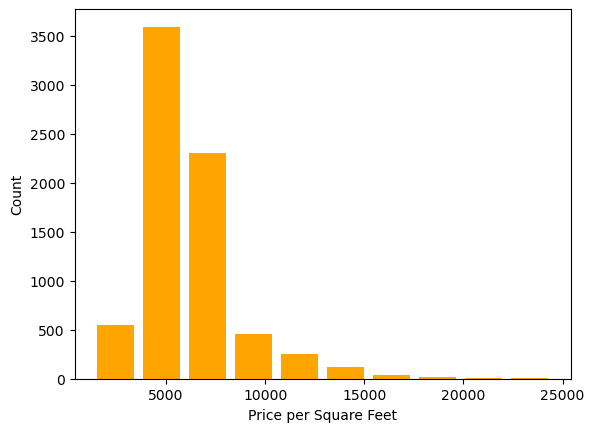

In [290]:
plt.hist(df7.price_per_sqft,rwidth=0.8,color='Orange')
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')
plt.show()

Veamos la variable 'bath' y si hay anomalias en algunos registros (como mas baños que ambientes)

In [291]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [292]:
df7.groupby('bath').bath.count()

bath
1.0      568
2.0     4198
3.0     1763
4.0      503
5.0      175
6.0       81
7.0       16
8.0       13
9.0        7
12.0       3
13.0       1
16.0       1
Name: bath, dtype: int64

In [293]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.00
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.00
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.00
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.00
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.12


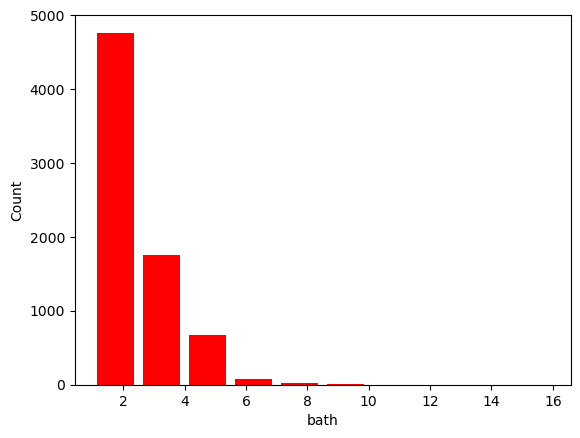

In [294]:
plt.hist(df7.bath,rwidth=0.8,color='red')
plt.xlabel('bath')
plt.ylabel('Count')
plt.show()

Veamos cuales registros donde hay mas baños que ambientes

In [295]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.57
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.90


como son anomalos los eliminaremos

In [296]:
df8=df7[df7.bath<df7.bhk+2]

In [297]:
df8.shape

(7251, 7)

Ya eliminamos los outliers y las casas que tenian condiciones raras (ej: mas balcones que baños). Ahora hacemos la ultima limpieza para determinar las features a considerar para nuestro algoritmo predicto

In [298]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81


Eliminamos las variables que no vamos a considerar para nuestro modelo

In [299]:
df9=df8.drop(['size','price_per_sqft'],axis=1)

In [300]:
df9.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


## Model-Building 

### One-Hot Encoding 

Realizamos el one-hot encoding en las variables categoricas para poder utilizarlo en nuestro algortimo (tomandola como numeros). En este caso tenemos unicamente la variable categorica 'location'

In [301]:
dummies= pd.get_dummies(df9['location'])

In [302]:
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Agregamos los dummies a nuestra data, eliminando una de las columnas para evitar la multicolinealidad

In [303]:
data=pd.concat([df9,dummies.drop('other',axis=1)],axis=1)

In [304]:
data.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [305]:
data=data.drop('location',axis=1)

In [306]:
data.shape

(7251, 245)

#### Separamos nuestra data en X Features y Y variables dependientes

In [307]:
x=data.drop('price',axis=1)
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [308]:
y=data['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

### Train-Test Split

Dividiremos nuestras features y la valarible predictora en grupo de Train y Test para entrenar en el modelo. Dividiremos asignando el 80% al train y el 20% restante al Test

In [309]:
from sklearn.model_selection import train_test_split

In [310]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

### Creacion del modelo Linear Regression

In [311]:
from sklearn.linear_model import LinearRegression

In [312]:
#Creamos el modelo
modelo=LinearRegression()

In [313]:
#Ajustamos y entrenamos con el grupo de entrenamiento X_train e Y_train
modelo.fit(X_train,y_train)

LinearRegression()

In [314]:
#Obtenemos el R-Score que es buen parametro para indicarnos que tan bueno el modelo es, en base al grupo de Testeo (X_test e y_test)
modelo.score(X_test,y_test)

0.8140210003747985

#### Hacemos la validacion cruzada (libreria Sklearn)

In [315]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [316]:
#El metodo Shuffle mezcla los registros para cuando hagamos la validacion cruzada tenga registros distintos y no el orden
#dado por el Dataset que puede llegar a ser tendencioso 
cv=ShuffleSplit(n_splits=7,test_size=0.2,random_state=0)

In [317]:
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286,
       0.77463657, 0.84724578])

Haciendo distintas validaciones no da un resultado bastante bueno cercano al 0.82

#### Probamos otro tipo de modelos de regression para comparar

##### A partir del metodo Grid Search vamos a obtener cuales es el mejor modelo y  parametros

In [318]:
from sklearn.model_selection import GridSearchCV

In [319]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor

In [320]:
#Probamos no solo el LinearRegression sino Arbol de Decision sino tambien el SGDRegrssor y obtenemos un df con el resultado
def buscar_mejor_modelo_gridsearchcv(X,y):
    algoritmos={
        'linear_regression': {
            'model':LinearRegression(),
            'params':{
                'fit_intercept':(True,False)
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'SGDRegressor':{
            'model':SGDRegressor(),
            'params':{
                'max_iter':[10000,1000,1000000,100000,50000,100], 
                'eta0':[0.0002, 0.002, 0.02, 0.2,0.0001,0.001,0.01,0.1],
                'learning_rate':['constante','invscaling']
                
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for nombre_algoritmo, config in algoritmos.items():
        grindsearch=GridSearchCV(config['model'],config['params'],refit=True,cv=cv,return_train_score=False)
        grindsearch.fit(X,y)
        scores.append({
            'model':nombre_algoritmo,
            'mejor_score':grindsearch.best_score_,
            'mejores_parametros':grindsearch.best_params_
        })
    
    return pd.DataFrame(scores,columns=['model','mejor_score','mejores_parametros'])

In [165]:
buscar_mejor_modelo_gridsearchcv(x,y)

C:\Users\fedev\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fedev\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fedev\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\fedev\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\fedev\anaconda3\lib\site-packages\sklearn\base.py", line 

,model,mejor_score,mejores_parametros
0,linear_regression,8.190012e-01,{'fit_intercept': False}
1,decision_tree,7.187600e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,SGDRegressor,-1.816645e+21,"{'eta0': 0.0001, 'learning_rate': 'invscaling'..."


Vemos que el Linear_Regression es el que mejor Score nos otorga, por encima del arbol de decision y el SGDRegressor (que nos da unos valores extraordinarios)

Por lo que vamos a usar el mismo modelo que ejecutamos con Linear Regression mas arriba

### Prediccion

Diseñamos una funcion para predecir precios. Le pasamos los datos de forma separada para despues poder diseñar una aplicacion web o directorio y que tenga la misma entrada. A partir del dato ingresado de la 'location' ubicaremos en que columna de nuestro DF se ubica, luego creamos un array de numpy para replicar nuestro formato de features de entrada a nuestro algoritmo. Donde cada una variable es asignada a un lugar especifico (incluso ubicando la locacion que toma un formato Dummie)
Luego queda hacer una prediccion de nuestro modelo con el array creado y obtenemos el precio estimado

In [321]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [322]:
def prediccion_precio(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    x2=np.zeros(len(x.columns))
    x2[0]=sqft
    x2[1]=bath
    x2[2]=bhk
    if loc_index>=0:
        x2[loc_index]=1
        
    return modelo.predict([x2])[0]

Predecimos un valor de una casa en base a su ubicacion, dimension, cantidad de baños y habitaciones. Ejemplo:

In [221]:
prediccion_precio('Yeshwanthpur',1500,2,2)

C:\Users\fedev\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


108.84958638713505

Comprobamos con algun ejemplo el resultado obtenido

In [328]:
df[(df['location']=='Yeshwanthpur')&(df['total_sqft']=='1500')]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
10142,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,GoandAc,1500,3.0,1.0,100.0


In [332]:
prediccion_precio('Yeshwanthpur',1500,3,3)

C:\Users\fedev\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


109.26079532973941